In [ ]:
                        Haberman Data Analysis

In [ ]:
Objective: To Classify the various features and to understand their behaviour

In [82]:
# import all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# naming the columns in the data set as they were original un-named in the data set
'''
1st Column specifies the age of patient, 2nd column specifies year of operation of patient starting from 19's
3rd Column specifies the number of positive axillary nodes detected and the 4th column specifies that whether the 
patient survived or did not survive more than 5 years.
'''
column_name = ['Age_of_patient', 'Year_of_operation', 'Axillary_nodes_detected', 'Survival_status']

# reading the haberman data set
haberman = pd.read_csv("haberman.csv", names = column_name)


In [83]:
# Finding the dimensions of the Data set/ number of points with 4 features including the class attribute

In [84]:
print(haberman.shape)

(306, 4)


In [85]:
#Finding the names of the attributes or features the class attribute is Survival_status 
print(haberman.columns)

Index(['Age_of_patient', 'Year_of_operation', 'Axillary_nodes_detected',
       'Survival_status'],
      dtype='object')


In [86]:
'''
Finding the count of the number of patients survived or not with '1' representing as patient survived 5 years or longer
and '2' representing patient died within 5 years.

The output we get is an imbalanced data set.
'''
haberman.Survival_status.value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

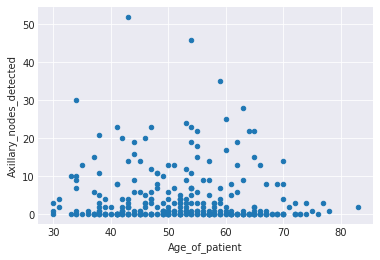

In [87]:
''' 
This plot shows the Age of the patient v/s the axillary nodes detected.
 We can see that we can't really get any conclusions from this as the plot is dense when the axillary nodes detected 
 less than 10.
'''
haberman.plot(kind ='scatter', x ='Age_of_patient', y ='Axillary_nodes_detected') ;
plt.show()

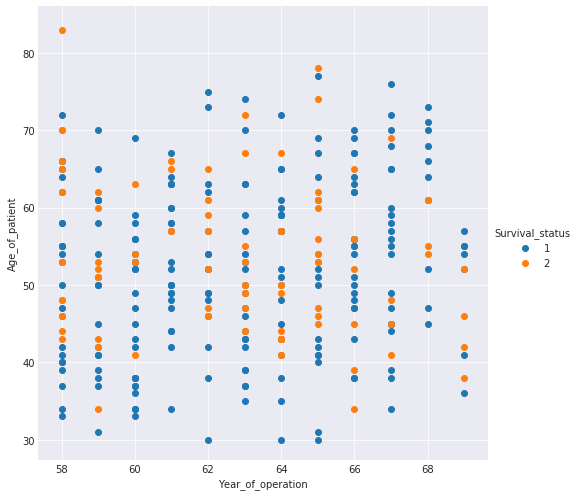

In [88]:
'''
After not getting useful insight from the above plot we see if we can seperate Year of operation of patient
from age of patient but we see the points are scattered and are not linearly seperable.

'''
sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="Survival_status", size=7) \
 .map(plt.scatter, "Year_of_operation", "Age_of_patient") .add_legend();
plt.show();
plt.close();

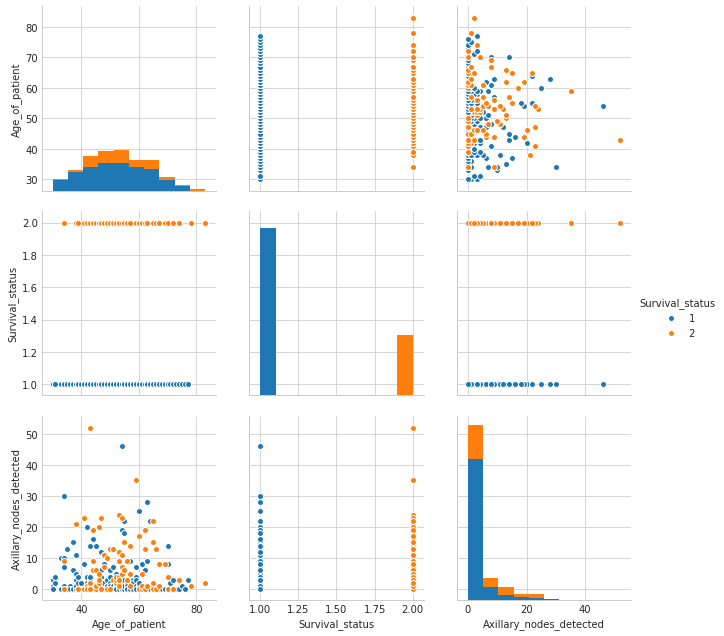

In [89]:
'''
Now, we see that after getting very less insight from bi-variate analysis of scatter plot. Therefore, we go for pair-plots
so that we can see have a better insight to the data and see which all are seperable.

The bar graphs show the count of the respective attributes and is used for 1-dimensional plot.

'''
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_status", size=3, x_vars=['Age_of_patient', 'Survival_status','Axillary_nodes_detected'],
             y_vars=['Age_of_patient', 'Survival_status','Axillary_nodes_detected']);
plt.show()

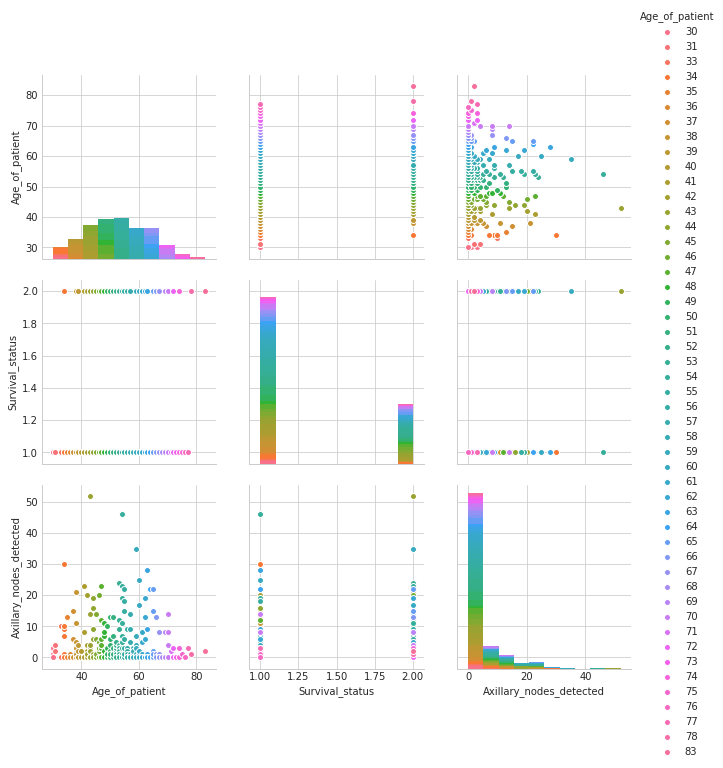

In [90]:
'''
Now, we see that after getting very less insight from bi-variate analysis of scatter plot. Therefore, we go for pair-plots
so that we can see have a better insight to the data and see which all are seperable.

The bar graphs show the count of the respective attributes and is used for 1-dimensional scatter plot.

We can see from the pair-plot that Age_of_patient v/s Survival Status or vice-versa is seperable from both the pair-plots 
above and below.
'''

sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Age_of_patient", size=3, x_vars=['Age_of_patient', 'Survival_status','Axillary_nodes_detected'],
             y_vars=['Age_of_patient', 'Survival_status','Axillary_nodes_detected']);
plt.show()

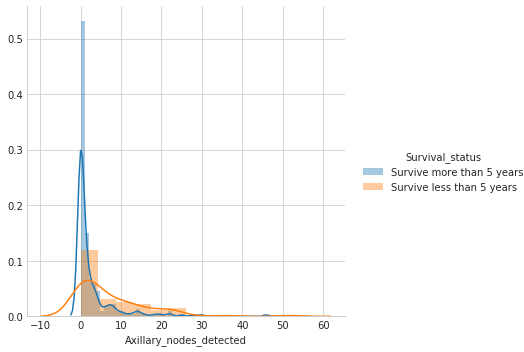

In [125]:
'''
By this distribution plot we see that axillary nodes detected for patient who survived for more than 5 years and 
patient who died within 5 years is coinciding at roughly (Axillary_nodes_detected)x=3. So, this pdf is not better in 
terms of seperation of one group from other, but as we got an imbalanced data set we can use this one. 


'''

s = sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Axillary_nodes_detected") \
   .add_legend();


new_title = 'Survival_status'
s._legend.set_title(new_title)
new_labels = ['Survive more than 5 years', 'Survive less than 5 years']
for i, j in zip(s._legend.texts, new_labels):
    i.set_text(j)

s.fig.get_children()[-1].set_bbox_to_anchor((1.2, 0.5, 0, 0))
   
plt.show();

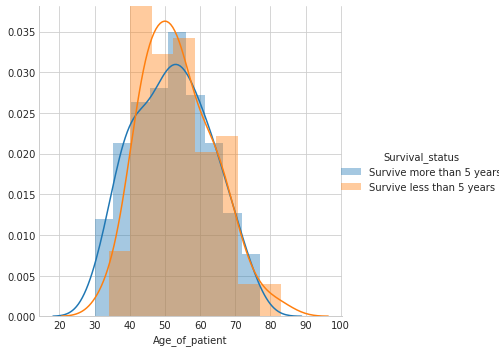

In [132]:
'''
By this distribution plot we see that Age of patient who survived for more than 5 years and patient who died
within 5 years is coinciding at roughly (Age_of_patient)x=58. So, this pdf is not much better in 
terms of seperation of one group from other but we can choose this as the one as data is imbalanced.


'''


s = sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Age_of_patient") \
   .add_legend();

new_title = 'Survival_status'
s._legend.set_title(new_title)
new_labels = ['Survive more than 5 years', 'Survive less than 5 years']
for i, j in zip(s._legend.texts, new_labels):
    i.set_text(j)

s.fig.get_children()[-1].set_bbox_to_anchor((1.15, 0.5, 0, 0))
   
plt.show();

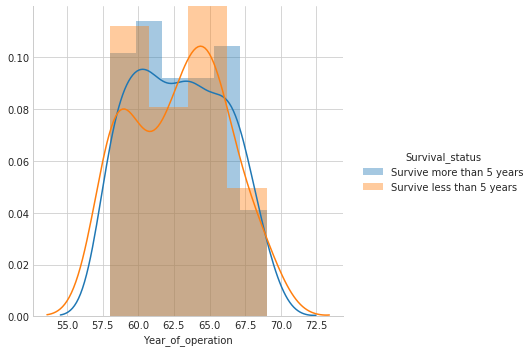

In [133]:
'''
By this distribution plot we see that Year of operation of the patient who survived for more than 5 years and 
patient who died within 5 years is coinciding at roughly 4 points. So, this pdf is not much better in 
terms of seperation of one group from other but just worst than all other.


'''


s = sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Year_of_operation") \
   .add_legend();

new_title = 'Survival_status'
s._legend.set_title(new_title)
new_labels = ['Survive more than 5 years', 'Survive less than 5 years']
for i, j in zip(s._legend.texts, new_labels):
    i.set_text(j)

s.fig.get_children()[-1].set_bbox_to_anchor((1.2, 0.5, 0, 0))
   
plt.show();


In [134]:
haberman_more_than_5 = haberman.loc[haberman["Survival_status"] == 1];
haberman_less_than_5 = haberman.loc[haberman["Survival_status"] == 2];

In [135]:
# Finding the median of the survived and not survived patient more than 5 years


print(np.median(haberman_more_than_5["Age_of_patient"]))
print(np.median(haberman_less_than_5["Age_of_patient"]))


52.0
53.0


In [136]:
# Finding the standard deviation of the survived and not survived patient more than 5 years

print(np.std(haberman_more_than_5["Age_of_patient"]))
print(np.std(haberman_less_than_5["Age_of_patient"]))


10.98765547510051
10.10418219303131


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


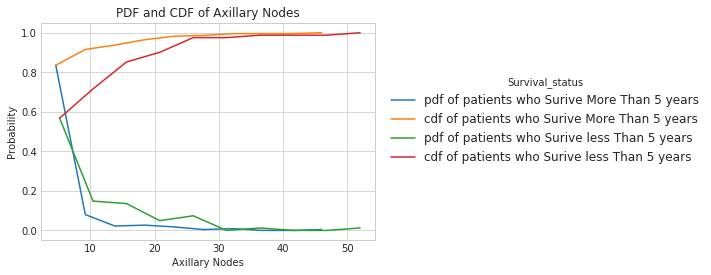

' We can see from the CDF (the orange and red line) that if the axillary nodes detected are 15 then there is 92% chance \nthat the patient will surivive more than 5 years(corresponding to the orange line(cdf) in plot from the blue line (pdf) \nand if the axillary and if we see the other group that is if the axillary nodes detected are 15 then there is 86% \nchance that the patient will not survive more than 5 years(green line(pdf) corresponding red line(cdf)\n    \n'

In [137]:
'''
Finding the CDF of the year of operation from the PDF.
pdf is nothing but the number of observations divided by total sum of observations.
and cdf is the cumulative sum of all the pdf.
Then, plotiing the bins_edges which is an array for pdf and cdf i.e. the width of each bin is an int equal to 10 

'''

total, bin_edges = np.histogram(haberman_more_than_5['Axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = total/(sum(total))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf of patients who Surive More Than 5 years')
plt.title('PDF and CDF of Axillary Nodes')
plt.xlabel('Axillary Nodes')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf, label='cdf of patients who Surive More Than 5 years')


total, bin_edges = np.histogram(haberman_less_than_5['Axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = total/(sum(total))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf of patients who Surive less Than 5 years')
plt.plot(bin_edges[1:], cdf, label='cdf of patients who Surive less Than 5 years')

plt.legend(loc='best', bbox_to_anchor=(2.0, 0.8),title='Survival_status', fontsize='large')
plt.show();

''' We can see from the CDF (the orange and red line) that if the axillary nodes detected are 15 then there is 92% chance 
that the patient will surivive more than 5 years(corresponding to the orange line(cdf) in plot from the blue line (pdf) 
and if the axillary and if we see the other group that is if the axillary nodes detected are 15 then there is 86% 
chance that the patient will not survive more than 5 years(green line(pdf) corresponding red line(cdf)
    
'''    

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


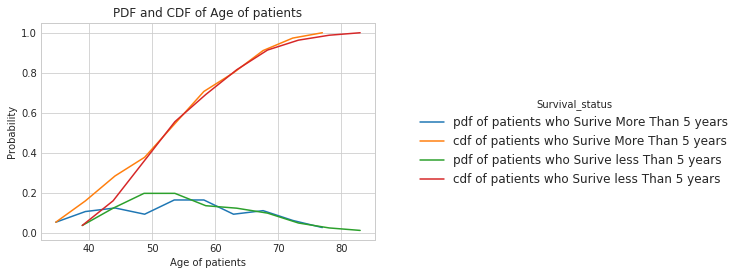

' We can see from the CDF (the orange and red line) that the age of patient is 77 and 83 for both patients who survived more than\n    5 years and died within 5 years. Suppose at point year of operation is 70(green line) then 0.93 (red line) i.e. 93% \n    of age of patients is less than or equal to 70 who die within 5 years. .\n    \n'

In [138]:
'''
Finding the CDF of the year of operation from the PDF.
pdf is nothing but the number of observations divided by total sum of observations.
and cdf is the cumulative sum of all the pdf.
Then, plotiing the bins_edges which is an array for pdf and cdf i.e. the width of each bin is an int equal to 10 

'''

total, bin_edges = np.histogram(haberman_more_than_5['Age_of_patient'], bins=10, 
                                 density = True)
pdf = total/(sum(total))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf of patients who Surive More Than 5 years')
plt.title('PDF and CDF of Age of patients')
plt.xlabel('Age of patients')
plt.ylabel('Probability')
plt.plot(bin_edges[1:], cdf, label='cdf of patients who Surive More Than 5 years')


total, bin_edges = np.histogram(haberman_less_than_5['Age_of_patient'], bins=10, 
                                 density = True)
pdf = total/(sum(total))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf of patients who Surive less Than 5 years')
plt.plot(bin_edges[1:], cdf, label='cdf of patients who Surive less Than 5 years')

plt.legend(loc='upper left',bbox_to_anchor=(1.1, 0.7), title='Survival_status', fontsize='large')
plt.show();

''' We can see from the CDF (the orange and red line) that the age of patient is 77 and 83 for both patients who survived more than
    5 years and died within 5 years. Suppose at point year of operation is 70(green line) then 0.93 (red line) i.e. 93% 
    of age of patients is less than or equal to 70 who die within 5 years. .
    
'''  

In [139]:
''' 
Age of patient with patient more than 5 years of surviving with 0 percentile, 25 percentile, 50 percentile, 75 percentile 

Age of patient with patient died within the 5 years with 0 percentile, 25 percentile, 50 percentile, 75 percentile 
'''
print(np.percentile(haberman_more_than_5["Age_of_patient"],np.arange(0, 100, 25)))
print(np.percentile(haberman_less_than_5["Age_of_patient"],np.arange(0, 100, 25)))

[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [140]:
''' 
Age of patient with patient more than 5 years of surviving with 90th percentile 

Age of patient with patient died within the 5 years with 90th percentile 
'''

print(np.percentile(haberman_more_than_5["Age_of_patient"],90))
print(np.percentile(haberman_less_than_5["Age_of_patient"],90))

# The 90th percentile of both groups is 67

67.0
67.0


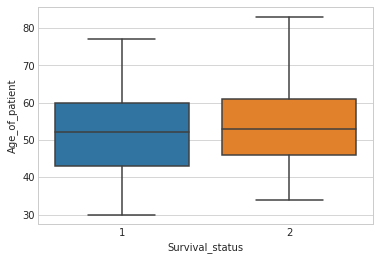

In [141]:
# The boxplot shows that the age of patient for group 1 and group 2 as 25th, 50th and 75th percentile.

sns.boxplot(x='Survival_status',y='Age_of_patient', data=haberman)
plt.show()


# The 75th percentile of group '1' is 60.
# The 75th percentile of group '2' is 61-62.

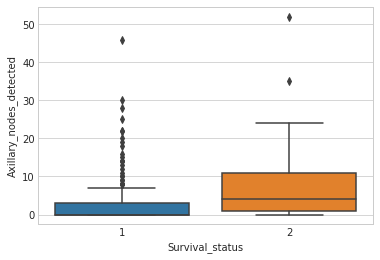

In [142]:
# The boxplot shows that the axillary nods detected for group 1 and group 2 as 25th, 50th and 75th percentile.

sns.boxplot(x='Survival_status',y='Axillary_nodes_detected', data=haberman)
plt.show()


# The 75th percentile of group '1' is 3-4 that means patient who survived more than 5 years have axillary nodes detected 
# are roughly between 3-4(75th percentile)
# The 75th percentile of group '2' is 11.
# One more thing to notice is that for group 1 25th and 50th percentile is same which is 0.

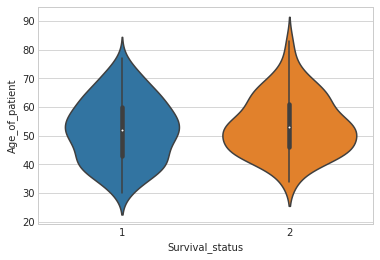

In [143]:
''' The violinplot shows that the age of patient for group 1 and group 2 as 25th, 50th and 75th percentile and the pdf 
along the edges.
'''

sns.violinplot(x='Survival_status',y='Age_of_patient', data=haberman)
plt.show()

In [144]:
We can see from this violin plot of figure 1 that the Age of patient who survived more than 5 years after being positive
for cancer the 50th Percentile is Age = 52.

We can see from this violin plot of figure 2 that the Age of patient who died within 5 years after being positive for
cancer the 50th Percentile is Age = 54.

So, one feature that can be used is Age_of_patient and Survival_status as classification of the data.

SyntaxError: invalid syntax (<ipython-input-144-4d4dbe09124d>, line 1)

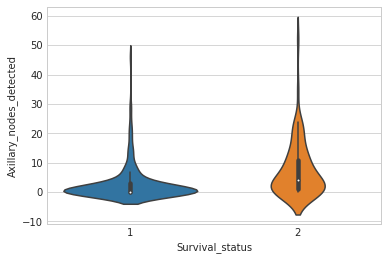

In [145]:
sns.violinplot(x='Survival_status',y='Axillary_nodes_detected', data=haberman)
plt.show()

In [ ]:
We can see from the violin plot of figure 1 that the Axillary nodes detected for patients who survived more than 5 years
after being positive for cancer the 50th Percentile is nodes detected = 0.

We can see from the violin plot of figure 1 that the Axillary nodes detected for patients who died within 5 years
after being positive for cancer the 50th Percentile is nodes detected = 4.

So, the other feature that can be used is Axillary_nodes_detected and Survival_status as classification of the data.

In [ ]:
Summary:
    
Therefore, we can see from the findings that the median age of survival is 52 and not survival is 53. 
The 90th percentile of patients not surviving and surviving is age = 67.
From the findings of the EDA we see that the age of patient is 77 and 83 for both patients who survived more than
5 years and died within 5 years.
The most important features are Age of Patient and his Survival Status(class label) which is 1(surviving more than 5 years) and 2(surviving less
than 5 years).
As seen from the pair plots Age of Patient and his survival status given he is detected positive is differntiable from the pair plot
as number of axillary nodes detected v/s Survival Status.
